In [3]:
# mathematical operations-linear Algebra
import numpy as np 

# dataframe
import pandas as pd 
import re


# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
#

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import load_model


# Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
# from matplotlib.ticker import MaxNLocator
# import matplotlib.gridspec as gridspec
# import matplotlib.patches as mpatches
import seaborn as sns

# NLTK

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
# from nltk.probability import FreqDist


In [4]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

2.17.0
3.6.0


In [5]:
df = pd.read_csv("Twitter_Data.csv")

In [6]:
df.head(5)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


# Data Pre-processing

In [7]:
# Checking information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [8]:
# Check for missing values
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [9]:
# Fill missing values in the 'clean_text' column with empty strings
df['clean_text'].fillna('', inplace=True)

C:\Users\omar\AppData\Local\Temp\ipykernel_6104\3628717335.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['clean_text'].fillna('', inplace=True)


In [10]:
# Drop rows with missing values in the 'category' column
df.dropna(subset=['category'], inplace=True)

In [11]:
# Confirming the changes
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [12]:
df.duplicated().sum()

1

In [ ]:
df = pd.read_csv("Twitter_Data.csv")
df['clean_text'].fillna('', inplace=True)
df.dropna(subset=['category'], inplace=True)
X = df['clean_text']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [13]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Sentiment Analysis using Deep-Learning Model--LSTM

In [14]:
# Define input and target variables
X = df['clean_text']
y = df['category']

In [15]:
y.value_counts()

category
 1.0    72250
 0.0    55212
-1.0    35510
Name: count, dtype: int64

In [16]:
# Encode target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)
y = utils.to_categorical(y)

[0 1 2 ... 1 1 2]


In [17]:
y[0]

array([1., 0., 0.])

In [18]:
# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

In [19]:
# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1
vocab_size

113679

In [20]:
# Max sequence length
max_seq_length = max([len(seq) for seq in sequences])
max_seq_length

52

In [21]:
# Pad sequences
X_pad = pad_sequences(sequences, maxlen=max_seq_length)
X_pad[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,  286,   16,    2, 1104,    3,
        718,   16,    2,  809,    7,   38,    4,    1])

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

In [23]:
# Define LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_shape=(max_seq_length,)))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=3, activation='softmax'))

c:\Users\omar\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# Model summary
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 52, 100)        │    11,367,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,485,535 (43.81 MB)

 Trainable params: 11,485,535 (43.81 MB)

 Non-trainable params: 0 (0.00 B)

None


In [26]:
# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [27]:
# Train model
history = model.fit(X_train, y_train, batch_size=128, epochs=15 , validation_split=0.1, callbacks=[reduce_lr, early_stop])

Epoch 1/15
917/917 ━━━━━━━━━━━━━━━━━━━━ 192s 205ms/step - accuracy: 0.7559 - loss: 0.5773 - val_accuracy: 0.9518 - val_loss: 0.1655 - learning_rate: 0.0010
Epoch 2/15
917/917 ━━━━━━━━━━━━━━━━━━━━ 183s 199ms/step - accuracy: 0.9622 - loss: 0.1271 - val_accuracy: 0.9568 - val_loss: 0.1421 - learning_rate: 0.0010
Epoch 3/15
917/917 ━━━━━━━━━━━━━━━━━━━━ 181s 197ms/step - accuracy: 0.9772 - loss: 0.0733 - val_accuracy: 0.9633 - val_loss: 0.1260 - learning_rate: 0.0010
Epoch 4/15
917/917 ━━━━━━━━━━━━━━━━━━━━ 182s 198ms/step - accuracy: 0.9865 - loss: 0.0423 - val_accuracy: 0.9643 - val_loss: 0.1220 - learning_rate: 0.0010
Epoch 5/15
917/917 ━━━━━━━━━━━━━━━━━━━━ 187s 204ms/step - accuracy: 0.9910 - loss: 0.0279 - val_accuracy: 0.9621 - val_loss: 0.1371 - learning_rate: 0.0010
Epoch 6/15
917/917 ━━━━━━━━━━━━━━━━━━━━ 137s 150ms/step - accuracy: 0.9940 - loss: 0.0192 - val_accuracy: 0.9637 - val_loss: 0.1477 - learning_rate: 0.0010
Epoch 7/15
917/917 ━━━━━━━━━━━━━━━━━━━━ 124s 136ms/step - accura

In [28]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

1019/1019 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9644 - loss: 0.1182
Test Loss: 0.11565237492322922
Test Accuracy: 96.60%


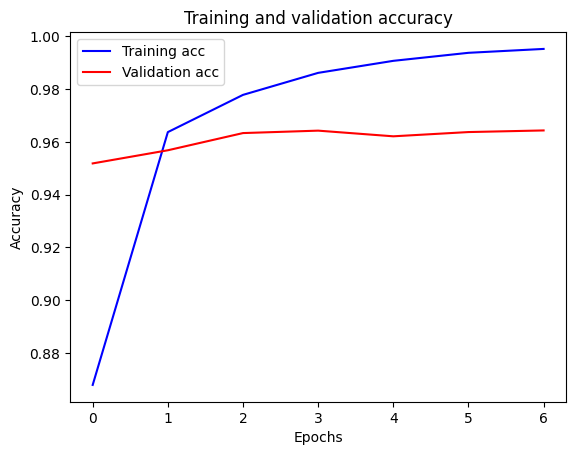

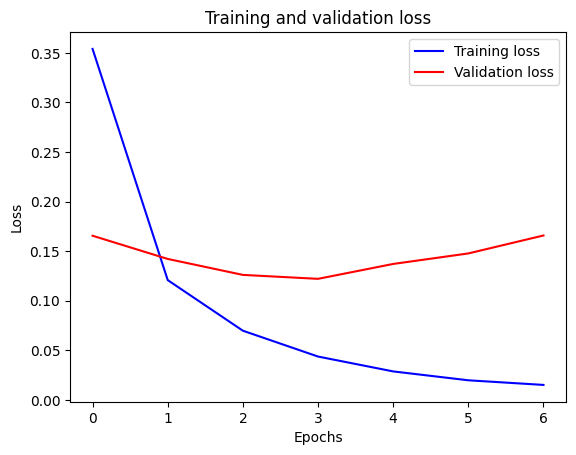

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))

# Plot training and validation accuracy
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

# Plot training and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#  Model Prediction

In [30]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels to original labels
true_labels = np.argmax(y_test, axis=1)

# Print some examples of predicted and true labels
print("Examples of Predictions vs True Labels:")
for i in range(5):
    print("Predicted:", predicted_labels[i], "True:", true_labels[i])

1019/1019 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step
Examples of Predictions vs True Labels:
Predicted: 1 True: 1
Predicted: 1 True: 1
Predicted: 0 True: 1
Predicted: 2 True: 2
Predicted: 1 True: 1


# Confusion Matrix

1019/1019 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step


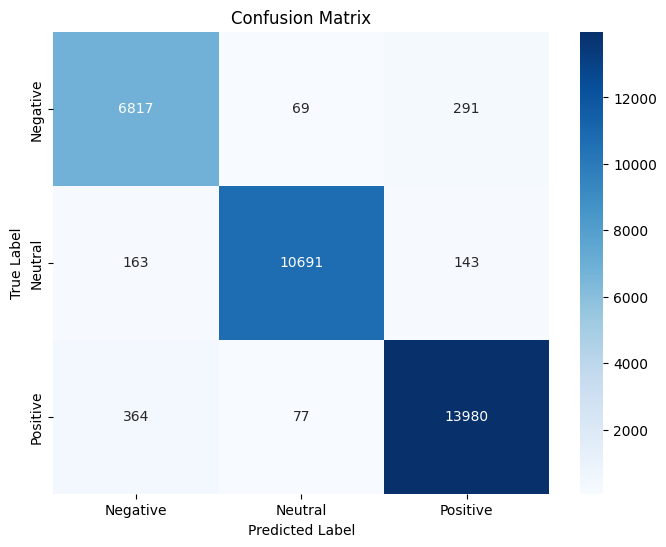

In [31]:
# Make predictions on the entire test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# classification report

In [32]:
# Classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['Negative', 'Neutral', 'Positive']))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      0.95      0.94      7177
     Neutral       0.99      0.97      0.98     10997
    Positive       0.97      0.97      0.97     14421

    accuracy                           0.97     32595
   macro avg       0.96      0.96      0.96     32595
weighted avg       0.97      0.97      0.97     32595



In [ ]:
model.save('Sentiment_Analysis_model.keras')

In [107]:
model = load_model('Sentiment_Analysis_model2.keras')  


def classify_sentiment(text):

    text = text.lower()
    
    text = re.sub(r'[^\w\s]', '', text)
    
    tokens = word_tokenize(text)
    
    tokens = [word for word in tokens if not word.isdigit()]
    
    lemmatizer = WordNetLemmatizer()
    
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    text = ' '.join(tokens)
        
    text_sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(text_sequence, maxlen=52)
    
    prediction = model.predict(padded_sequence)
    
    predicted_label = np.argmax(prediction)
    
    sentiment_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
    sentiment = sentiment_mapping[predicted_label]
    
    return text, sentiment

In [108]:
sentences = [
    "I love this movie, it's amazing!",
    "The weather today is beautiful.",
    "I feel happy when I'm with my friends.",
    "I'm excited about the new project at work.",
    "I'm not sure if I like the new design.",
    "I'm feeling a bit down today.",
    "This book is boring, I couldn't finish it.",
    "The customer service was terrible, I won't go back.",
    "I'm so angry right now!",
    "I'm indifferent about the outcome of the game.",
    "The traffic was horrible this morning.",
    "I'm grateful for all the help you've given me.",
    "I'm feeling anxious about the presentation tomorrow.",
    "The movie was okay, nothing special.",
]

print("Sentences and Predicted Sentiments:")
for sentence in sentences:
    sentiment = classify_sentiment(sentence)
    print("Sentence:", sentence)
    print("Predicted Sentiment:", sentiment)
    print()

Sentences and Predicted Sentiments:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Sentence: I love this movie, it's amazing!
Predicted Sentiment: ('i love this movie it amazing', 'Positive')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Sentence: The weather today is beautiful.
Predicted Sentiment: ('the weather today is beautiful', 'Positive')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Sentence: I feel happy when I'm with my friends.
Predicted Sentiment: ('i feel happy when im with my friend', 'Positive')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Sentence: I'm excited about the new project at work.
Predicted Sentiment: ('im excited about the new project at work', 'Positive')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Sentence: I'm not sure if I like the new design.
Predicted Sentiment: ('im not sure if i like the new design', 'Negative')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Sentence: I'm feeling a bit down today.
Predicted Sentiment: ('im feeling a bit down today', 'Negative')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26

In [109]:
# Example usage:
new_sample_text = "I love this movie, it's amazing!"
predicted_category = classify_sentiment(new_sample_text)
print(f"The predicted category is: {predicted_category}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The predicted category is: ('i love this movie it amazing', 'Positive')
